In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv', encoding="utf-8")
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


## Точечный график жесткости воды к смертности

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

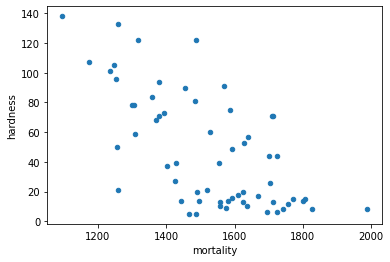

In [3]:
df.plot(kind='scatter', x='mortality', y='hardness')

Проглядывается обратная зависимость, чем меньше жесткость воды, тем больше смертность. Не наблюдается выбросов,
Которые могут исказить коэф Пирсона 

## Коэффициент корреляции Пирсона

In [4]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


Видим, что по Пирсону есть обратная взаимосвязь между жесткость воды и смертностью

## Коэффициент корреляции Спирмена

In [5]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


По Спирмену видим достаточно близкий результат с корреляцией Пирсона

## Построение модели линейной регрессии

In [6]:
x = df[['mortality']]
y = df['hardness']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=10)

Разделил тренировочные данные и данные для теста пополам, так как очень мало значений

In [8]:
model = LinearRegression()

In [9]:
model.fit(x_train, y_train)

LinearRegression()

In [10]:
model.coef_

array([-0.13253566])

In [11]:
model.intercept_

251.55708958070613

In [12]:
y_pred = model.predict(x_test)
y_pred

array([ 23.19814451,  57.25980957,  40.69285186,  12.99289857,
        12.06514893,  84.69469153,  84.56215587,  42.9459581 ,
        70.11576875, -11.79127017,  45.19906435,  95.82768711,
        62.29616471,  65.74209191,  68.79041213,  54.60909633,
        79.39326506,  60.17559412,  54.60909633,  34.19860443,
        67.06744853,  87.74301175,  25.98139341,  76.87508749,
        38.30720995,  30.48760591,  50.2354195 ,  42.01820847,
        20.67996694,  36.18663936,  58.58516618])

## Коэффициент детерминации

In [13]:
model.score(x_test, y_test)

0.38260090997814

Коэф детерминации оставляет желать лучшего, очень мало данных для построения более точной модели. 

## Визуализируем прогнозные данные

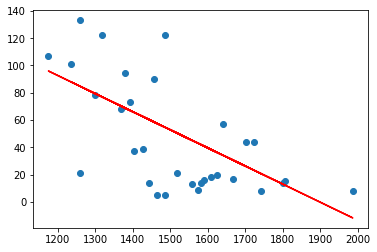

In [14]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

## График остатков

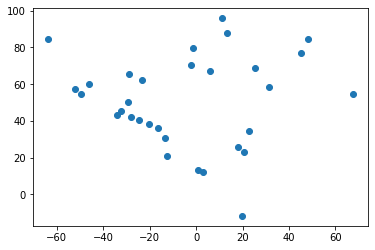

In [38]:
residuals = y_test-y_pred
plt.scatter(residuals, y_pred)
plt.show()

# Разбиение DataSetа на Южные и Северные города

In [16]:
df_south = df[df['location'] == 'South']
df_north = df[df['location'] == 'North']

df.groupby('location').plot(kind='scatter', x='mortality', y='hardness') 

Можно было сгруппровать по локации, но в таком случае даже при визуализации не подписать Заголовок. 
Поэтому решил просто разбить на два ДатаФрейма

## Точечный график

<AxesSubplot:title={'center':'North'}, xlabel='mortality', ylabel='hardness'>

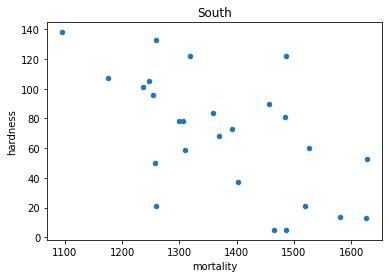

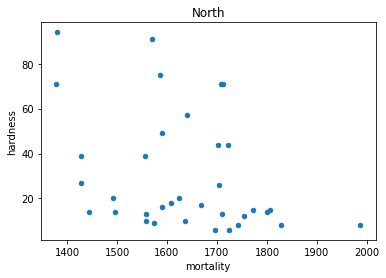

In [17]:
df_south.plot(kind='scatter', x='mortality', y='hardness', title='South')
df_north.plot(kind='scatter', x='mortality', y='hardness', title='North')

В отдельной визуализации уже не так просматривается взаимосвязь между жесткостью воды и смертностью. Но всеже кажется больше выраженной в Южных городах

## Коэффициет корреляции Пирсона

In [18]:
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [19]:
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


## Коэффициет корреляции Спирмена

In [20]:
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [21]:
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


По значения корреляций можно сделать вывод, что в Южных городах взаимосвязь между жесткостью воды и смертностью больше.

## Построение моделей линейной регрессии для каждого региона

In [22]:
x_south = df_south[['mortality']]
y_south = df_south['hardness']

x_north = df_north[['mortality']]
y_north = df_north['hardness']

In [23]:
x_south_train, x_south_test, y_south_train, y_south_test = train_test_split(x_south, y_south, test_size=0.50, random_state=15)
x_north_train, x_north_test, y_north_train, y_north_test = train_test_split(x_north, y_north, test_size=0.50, random_state=15)

In [24]:
model_south = LinearRegression()
model_north = LinearRegression()

In [25]:
model_south.fit(x_south_train, y_south_train)
model_north.fit(x_north_train, y_north_train)

LinearRegression()

In [26]:
y_south_pred = model_south.predict(x_south_test)
y_south_pred

array([ 52.28610803,  27.31944322,  85.39792591,  55.82747893,
        83.98137755,  52.46317658,  73.00312777,  74.77381322,
        45.0262977 ,  92.4806677 ,  92.30359915,  68.93055124,
       121.34284049])

In [27]:
y_north_pred = model_north.predict(x_north_test)
y_north_pred

array([-16.81767353,  16.83009016,  30.26541629,  47.74322994,
         8.74511514,  32.88114351,  49.7644737 ,  17.06788354,
         5.41600777,  28.12527585,  55.59041158,  10.76635889,
        26.22292878,  34.18900711,  16.2356067 ,  15.76001993,
        49.64557701,   4.58373093])

## Коэффициент детерминации

In [28]:
model_south.score(x_south_test, y_south_test)

0.3201363043898834

In [29]:
model_north.score(x_north_test, y_north_test)

-0.2283919897061677

Видим, что наша модель по Северным городам хуже SStot, она никак не объясняет зависимость данных

## Визуализируем прогнозные данные

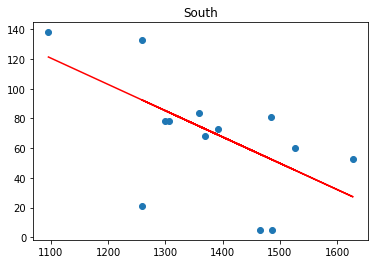

In [30]:
plt.scatter(x_south_test, y_south_test)
plt.title('South')
plt.plot(x_south_test, y_south_pred, c='r')

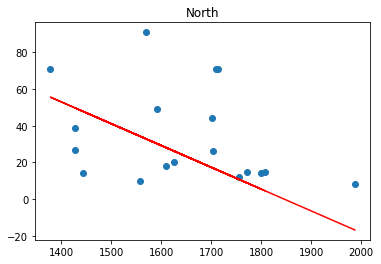

In [31]:
plt.scatter(x_north_test, y_north_test)
plt.title('North')
plt.plot(x_north_test, y_north_pred, c='r')

Заключение по группам:
    Очень мало данных, при изменении random_state мы получаем совершенно разные значения того же коэффициента детерминации.
    Поэтому сказать точно про разницу моделей Южных и Северных городов не могу, но в любом случае в Южных городах взаимосвязь сильнее

## Графики остатков

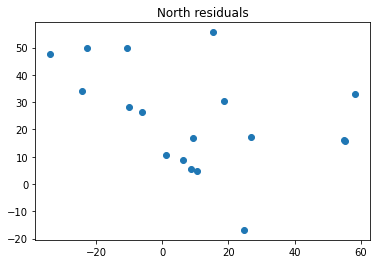

In [42]:
residuals_north = y_north_test-y_north_pred
plt.scatter(residuals_north, y_north_pred)
plt.title('North residuals')
plt.show()

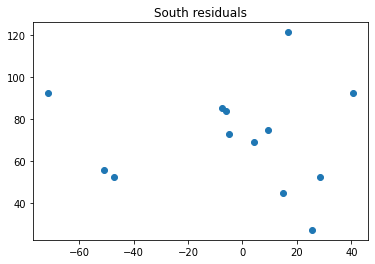

In [41]:
residuals_south = y_south_test-y_south_pred
plt.scatter(residuals_south, y_south_pred)
plt.title('South residuals')
plt.show()